## All imports:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.1f' % x)

## Working with data:

In [2]:
apple_store = pd.read_csv("appstore/AppleStore.csv")
apple_store_desc = pd.read_csv("appstore/appleStore_description.csv")
# importing all data for AppStore 


apple_store = apple_store.drop(['id', 'Unnamed: 0'], axis=1).astype({'size_bytes': 'int64',})

In [3]:
google_play_store = pd.read_csv("googleplay/googleplaystore.csv")
google_play_store_reviews = pd.read_csv("googleplay/googleplaystore_user_reviews.csv")
# importing all data for GooglePlay



for index in google_play_store.index:
    size = google_play_store.loc[index, 'Size']
    installs = google_play_store.loc[index, 'Installs']
    price = google_play_store.loc[index, 'Price']
    if installs.find("+") != -1:
        google_play_store.loc[index, 'Installs'] = installs[:-1].replace(",", "")
    if size.find("M") != -1:
        google_play_store.loc[index, 'Size'] = float(size[:-1]) * 125000 
        # removing "M" changing type from str to float and converting to bytes 
    elif size.find("k") != -1:
        google_play_store.loc[index, 'Size'] = float(size[:-1]) * 1000 
        # removing "k" changing type from str to float and converting to bytes 
    elif size.find('Varies') != -1:
        google_play_store.loc[index, 'Size'] = -1
    if price.find("$") != -1:
        google_play_store.loc[index, 'Price'] = price[1:]
        
        
google_play_store = google_play_store.astype({"Reviews": 'int32', "Rating": float, "Installs": 'int32', "Size": float, 'Price': float})\
.rename({'Size': 'size_bytes', 'Reviews': 'rating_count_total', 'Rating': 'rating', 'App': 'app', 'Current Ver': "ver", 'Price': 'price', 'Installs': 'installs'}, axis=1)


# make apple store genres and google play store categories with equal names
# todo music in google play

google_play_store['Genres'] = google_play_store['Genres'].str.split(';').str[0]

google_play_store['Genres'].replace('Music & Audio', 'Music', inplace = True)
google_play_store['Genres'].replace('Music & Video', 'Music', inplace = True)

#google_play_store['Category'].replace('Music & Video', 'Music', inplace = True)
#google_play_store['Category'].replace(' ', 'Music', inplace = True) #saffssdafsdsfsdfsdfdsfdsfsdfsdfsfsd

#google_play_store['Category'].replace('GAME', 'Games', inplace = True)
#google_play_store['Category'].replace('PRODUCTIVITY', 'Productivity', inplace = True)
#google_play_store['Category'].replace('WEATHER', 'Weather', inplace = True)
#google_play_store['Category'].replace('SHOPPING', 'Shopping', inplace = True)
#google_play_store['Category'].replace('FINANCE', 'Finance', inplace = True)
#google_play_store['Category'].replace('TOOLS', 'Utilities', inplace = True)
#google_play_store['Category'].replace('PERSONALIZATION', 'Utilities', inplace = True)
#google_play_store['Category'].replace('TRAVEL_AND_LOCAL', 'Travel', inplace = True)
#google_play_store['Category'].replace('SOCIAL', 'Social Networking', inplace = True)
#google_play_store['Category'].replace('DATING', 'Social Networking', inplace = True)
#google_play_store['Category'].replace('COMMUNICATION', 'Social Networking', inplace = True)
#google_play_store['Category'].replace('SPORTS', 'Sports', inplace = True)
#google_play_store['Category'].replace('BUSINESS', 'Business', inplace = True)
#google_play_store['Category'].replace('HEALTH_AND_FITNESS', 'Health & Fitness', inplace = True)
#google_play_store['Category'].replace('BEAUTY', 'Health & Fitness', inplace = True)
#google_play_store['Category'].replace('ENTERTAINMENT', 'Entertainment', inplace = True)
#google_play_store['Category'].replace('COMICS', 'Entertainment', inplace = True)
#google_play_store['Category'].replace('VIDEO_PLAYERS', 'Photo & Video', inplace = True)
#google_play_store['Category'].replace('PHOTOGRAPHY', 'Photo & Video', inplace = True)
#google_play_store['Category'].replace('ART_AND_DESIGN', 'Photo & Video', inplace = True)
#google_play_store['Category'].replace('MAPS_AND_NAVIGATION', 'Navigation', inplace = True)
#google_play_store['Category'].replace('EDUCATION', 'Education', inplace = True)
#google_play_store['Category'].replace('PARENTING', 'Education', inplace = True)
#google_play_store['Category'].replace('LIFESTYLE', 'Lifestyle', inplace = True)
#google_play_store['Category'].replace('EVENTS', 'Lifestyle', inplace = True)
#google_play_store['Category'].replace('HOUSE_AND_HOME', 'Lifestyle', inplace = True)
#google_play_store['Category'].replace('AUTO_AND_VEHICLES', 'Lifestyle', inplace = True)
#google_play_store['Category'].replace('FAMILY', 'Lifestyle', inplace = True)
#google_play_store['Category'].replace('FOOD_AND_DRINK', 'Food & Drink', inplace = True)
#google_play_store['Category'].replace('NEWS_AND_MAGAZINES', 'News', inplace = True)
#google_play_store['Category'].replace('MEDICAL', 'Medical', inplace = True)
#google_play_store['Category'].replace('LIBRARIES_AND_DEMO', 'Catalogs', inplace = True)


apple_store.prime_genre.replace('Book', 'Books & Reference', inplace = True)
apple_store.prime_genre.replace('Reference', 'Books & Reference', inplace = True)
#google_play_store['Category'].replace('BOOKS_AND_REFERENCE', 'Books & Reference', inplace = True)

catgry=pd.get_dummies(google_play_store['Category'],prefix='catg',drop_first=True)
frames=[google_play_store,catgry]
google_play_store = pd.concat(frames,axis=1)



In [4]:
#google_play_store[google_play_store['price'] > 60] # uncomment and run to see all expensive apps

In [5]:
# all apps with price above 110 is just "i am rich" and "most expensive app" so i think we can easily remove them
google_play_store = google_play_store[google_play_store['price'] <= 110]

#### After cells above:
    google_play_store :
        * reviews, installs are now type:int32
        * rating, size, price are now type:float
        * size now is int and it is in bytes
        * rating - plus "+" sign removed
        * junk/scam apps like "i am rich" with price 400 removed
        
    apple_store : (нехватает конечно количества скачиваний но можно написать примерное количество исходя из соотношения кол-ва оценок/кол-во скачиваний в гуглплэй)
        *

#### Cell bellow is for playing with dataframes

<IPython.core.display.Javascript object>


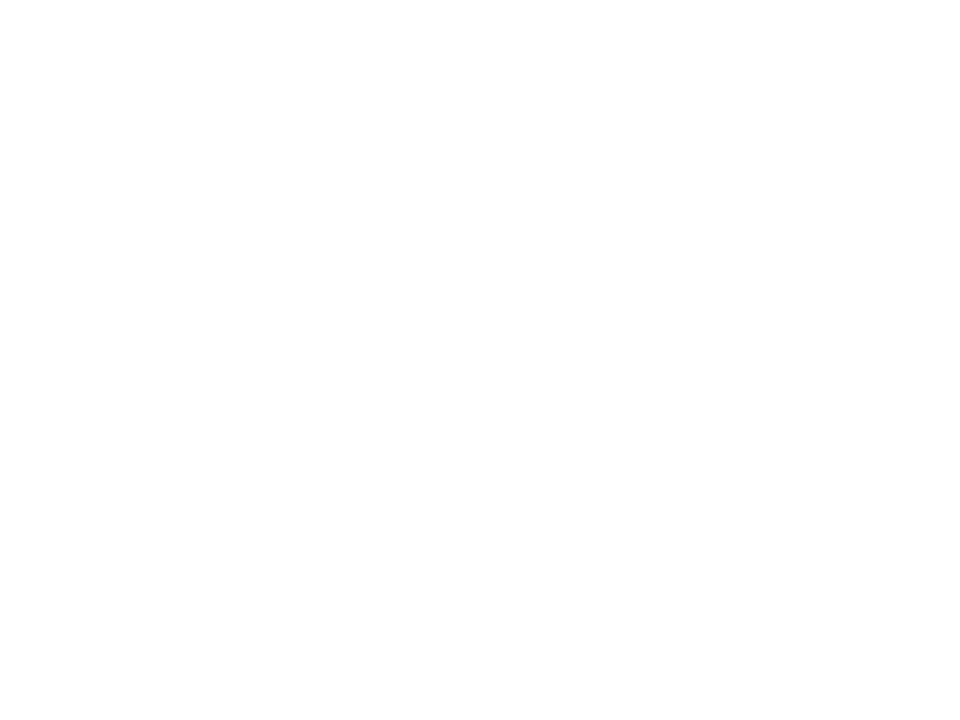

In [6]:
%matplotlib notebook
google_play_store[(google_play_store["rating_count_total"] > 300) & (google_play_store["rating"] >= 4.9)].sort_values(by=["rating_count_total"]) # apps with multiple genres are not in this top


paid_apps = google_play_store[google_play_store['price'] != 0.0]
df1 = paid_apps.groupby("price").mean()
df2 = google_play_store.groupby("price").mean()

plt.plot(df2.index, df2['installs'])

In [7]:
#apple_store.groupby("price").mean()

In [8]:
pd.set_option('display.max_rows', None)

In [9]:
#google_play_store.groupby("price").mean()

In [10]:
google_play_store.describe()

,rating,rating_count_total,size_bytes,installs,price,catg_AUTO_AND_VEHICLES,catg_BEAUTY,catg_BOOKS_AND_REFERENCE,catg_BUSINESS,catg_COMICS,...,catg_PERSONALIZATION,catg_PHOTOGRAPHY,catg_PRODUCTIVITY,catg_SHOPPING,catg_SOCIAL,catg_SPORTS,catg_TOOLS,catg_TRAVEL_AND_LOCAL,catg_VIDEO_PLAYERS,catg_WEATHER
count,9352.0,10822.0,10822.0,10822.0,10822.0,10822.0,10822.0,10822.0,10822.0,10822.0,...,10822.0,10822.0,10822.0,10822.0,10822.0,10822.0,10822.0,10822.0,10822.0,10822.0
mean,4.2,444890.8,2282107.8,15490040.2,0.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0
std,0.5,2930138.7,2764700.7,85097714.8,2.7,0.1,0.1,0.1,0.2,0.1,...,0.2,0.2,0.2,0.2,0.2,0.2,0.3,0.2,0.1,0.1
min,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,4.0,38.0,362500.0,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.3,2107.5,1150000.0,100000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,4.5,55013.2,3250000.0,5000000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,5.0,78158306.0,12500000.0,1000000000.0,110.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [11]:
#google_play_store
#apple_store


In [12]:
apple_store.describe()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,7197.0,7197.0,7197.0,7197.0,7197.0,7197.0,7197.0,7197.0,7197.0,7197.0
mean,199134453.8,1.7,12892.9,460.4,3.5,3.3,37.4,3.7,5.4,1.0
std,359206913.5,5.8,75739.4,3920.5,1.5,1.8,3.7,2.0,7.9,0.1
min,589824.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0
25%,46922752.0,0.0,28.0,1.0,3.5,2.5,37.0,3.0,1.0,1.0
50%,97153024.0,0.0,300.0,23.0,4.0,4.0,37.0,5.0,1.0,1.0
75%,181924864.0,2.0,2793.0,140.0,4.5,4.5,38.0,5.0,8.0,1.0
max,4025969664.0,300.0,2974676.0,177050.0,5.0,5.0,47.0,5.0,75.0,1.0


In [13]:
apple_store.size

107955

In [14]:
#apple_store.isnull().sum()

In [15]:
#google_play_store.isnull().sum()

In [16]:
#google_play_store.hist()

In [17]:
#apple_store.prime_genre.unique()

#apple_store.sort_values(by='prime_genre', ascending=True)

sorted(apple_store.prime_genre.unique())

['Books & Reference',
 'Business',
 'Catalogs',
 'Education',
 'Entertainment',
 'Finance',
 'Food & Drink',
 'Games',
 'Health & Fitness',
 'Lifestyle',
 'Medical',
 'Music',
 'Navigation',
 'News',
 'Photo & Video',
 'Productivity',
 'Shopping',
 'Social Networking',
 'Sports',
 'Travel',
 'Utilities',
 'Weather']

In [18]:
#google_play_store['Category'].unique()

#google_play_store.sort_values(by='Category', ascending=True)

sorted(google_play_store['Category'].unique())

['ART_AND_DESIGN',
 'AUTO_AND_VEHICLES',
 'BEAUTY',
 'BOOKS_AND_REFERENCE',
 'BUSINESS',
 'COMICS',
 'COMMUNICATION',
 'DATING',
 'EDUCATION',
 'ENTERTAINMENT',
 'EVENTS',
 'FAMILY',
 'FINANCE',
 'FOOD_AND_DRINK',
 'GAME',
 'HEALTH_AND_FITNESS',
 'HOUSE_AND_HOME',
 'LIBRARIES_AND_DEMO',
 'LIFESTYLE',
 'MAPS_AND_NAVIGATION',
 'MEDICAL',
 'NEWS_AND_MAGAZINES',
 'PARENTING',
 'PERSONALIZATION',
 'PHOTOGRAPHY',
 'PRODUCTIVITY',
 'SHOPPING',
 'SOCIAL',
 'SPORTS',
 'TOOLS',
 'TRAVEL_AND_LOCAL',
 'VIDEO_PLAYERS',
 'WEATHER']

In [19]:
#google_play_store['Genres'].unique()

In [20]:
#data prep
def impute_median(series):
    return series.fillna(series.median())
print(google_play_store.isnull().sum())

gps = google_play_store.copy()
gps.dropna(thresh=len(gps)*0.1,axis=1,inplace=True)
# Now imputing the categorical values
gps.Type.fillna(str(gps.Type.mode().values[0]),inplace=True)
gps.ver.fillna(str(gps.ver.mode().values[0]), inplace=True)
gps["Android Ver"].fillna(str(gps["Android Ver"].mode().values[0]),inplace=True)
gps.Genres.fillna(str(gps.Genres.mode().values[0]), inplace=True)
gps = gps.dropna()


gps.isnull().sum()

app                            0
Category                       0
rating                      1470
rating_count_total             0
size_bytes                     0
installs                       0
Type                           1
price                          0
Content Rating                 0
Genres                         1
Last Updated                   0
ver                            8
Android Ver                    2
catg_AUTO_AND_VEHICLES         0
catg_BEAUTY                    0
catg_BOOKS_AND_REFERENCE       0
catg_BUSINESS                  0
catg_COMICS                    0
catg_COMMUNICATION             0
catg_DATING                    0
catg_EDUCATION                 0
catg_ENTERTAINMENT             0
catg_EVENTS                    0
catg_FAMILY                    0
catg_FINANCE                   0
catg_FOOD_AND_DRINK            0
catg_GAME                      0
catg_HEALTH_AND_FITNESS        0
catg_HOUSE_AND_HOME            0
catg_LIBRARIES_AND_DEMO        0
catg_LIFES

app                         0
Category                    0
rating                      0
rating_count_total          0
size_bytes                  0
installs                    0
Type                        0
price                       0
Content Rating              0
Genres                      0
Last Updated                0
ver                         0
Android Ver                 0
catg_AUTO_AND_VEHICLES      0
catg_BEAUTY                 0
catg_BOOKS_AND_REFERENCE    0
catg_BUSINESS               0
catg_COMICS                 0
catg_COMMUNICATION          0
catg_DATING                 0
catg_EDUCATION              0
catg_ENTERTAINMENT          0
catg_EVENTS                 0
catg_FAMILY                 0
catg_FINANCE                0
catg_FOOD_AND_DRINK         0
catg_GAME                   0
catg_HEALTH_AND_FITNESS     0
catg_HOUSE_AND_HOME         0
catg_LIBRARIES_AND_DEMO     0
catg_LIFESTYLE              0
catg_MAPS_AND_NAVIGATION    0
catg_MEDICAL                0
catg_NEWS_

In [21]:
as_copy = apple_store.copy()
apple_store.isnull().sum()

track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
dtype: int64

In [22]:
#TODO
# create train & test data
# Google :By genre/category and price predict reiting and install count
# Appstore 


from sklearn.model_selection import train_test_split
#categories = sorted(google_play_store['Category'].unique())
#dictOfWords = { categories[i] : i for i in range(len(categories) ) }
#reverseDict = { i : categories[i] for i in range(len(categories) ) }

#for each in range(len(gps['Category'])):
#    gps.Category.iloc[each] = dictOfWords.get(gps.Category.iloc[each])
    

like = gps.copy()
like.drop(['app','Genres','Last Updated','ver','Android Ver','Type','Category', 'Content Rating'],axis=1,inplace=True)
print(like.columns)
X = like
y = gps.rating
z = gps.installs
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=0)
x_train, x_test, z_train, z_test = train_test_split(X,z,test_size=0.30, random_state=0) 

Index(['rating', 'rating_count_total', 'size_bytes', 'installs', 'price',
       'catg_AUTO_AND_VEHICLES', 'catg_BEAUTY', 'catg_BOOKS_AND_REFERENCE',
       'catg_BUSINESS', 'catg_COMICS', 'catg_COMMUNICATION', 'catg_DATING',
       'catg_EDUCATION', 'catg_ENTERTAINMENT', 'catg_EVENTS', 'catg_FAMILY',
       'catg_FINANCE', 'catg_FOOD_AND_DRINK', 'catg_GAME',
       'catg_HEALTH_AND_FITNESS', 'catg_HOUSE_AND_HOME',
       'catg_LIBRARIES_AND_DEMO', 'catg_LIFESTYLE', 'catg_MAPS_AND_NAVIGATION',
       'catg_MEDICAL', 'catg_NEWS_AND_MAGAZINES', 'catg_PARENTING',
       'catg_PERSONALIZATION', 'catg_PHOTOGRAPHY', 'catg_PRODUCTIVITY',
       'catg_SHOPPING', 'catg_SOCIAL', 'catg_SPORTS', 'catg_TOOLS',
       'catg_TRAVEL_AND_LOCAL', 'catg_VIDEO_PLAYERS', 'catg_WEATHER'],
      dtype='object')


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

lab_enc = preprocessing.LabelEncoder()


y_train_encoded = lab_enc.fit_transform(y_train)
z_train_encoded = lab_enc.fit_transform(z_train)
y_test_encoded = lab_enc.fit_transform(y_test)
z_test_encoded = lab_enc.fit_transform(z_test)

lr_model = LogisticRegression(max_iter=1000000).fit(X_train, y_train_encoded)
lr_mode = LogisticRegression(max_iter=1000000).fit(x_train, z_train_encoded)
predR = lr_model.predict(X_test)
predI = lr_mode.predict(x_test)

accRLogisticRegression = accuracy_score(y_test_encoded,predR)
print(accRLogisticRegression)
accILogisticRageression = accuracy_score(z_test_encoded,predI)
print(accILogisticRageression)

print("RMSE:", np.sqrt(mean_squared_error(y_test_encoded, predR)))
print("RMSE:", np.sqrt(mean_squared_error(z_test_encoded, predI)))


0.07448325017818959
0.35317177476835354
RMSE: 7.1138286018886605
RMSE: 2.546222727529859


c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
genres = sorted(apple_store.prime_genre.unique())
dictOfWords = { genres[i] : i for i in range(len(genres) ) }
reverseDict = { i : genres[i] for i in range(len(genres) ) }

as_copy = apple_store.copy()
for each in range(len(as_copy.prime_genre)):
    as_copy.prime_genre.iloc[each] = dictOfWords.get(as_copy.prime_genre.iloc[each])

aX = as_copy[['prime_genre', 'price']]
ay = as_copy.rating_count_ver
aX_train, aX_test, ay_train, ay_test = train_test_split(aX,ay,test_size=0.30, random_state=0)
print(ay_test.size)

c:\python38\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


2160


In [25]:
alab_enc = preprocessing.LabelEncoder()

ay_train_encoded = alab_enc.fit_transform(ay_train)
ay_test_encoded = alab_enc.fit_transform(ay_test)

alr_model = SGDClassifier(max_iter=10000).fit(aX_train, ay_train_encoded)
apredR = alr_model.predict(aX_test)
#apredI = lr_mode.predict(aX_test)

accSGD = accuracy_score(ay_test_encoded,apredR)
#accI = accuracy_score(z_test_encoded,apredI)
print("Rating accuracy: ", accSGD)
#print("Install accuracy: ", accI)
print("RMSE:", np.sqrt(mean_squared_error(ay_test, apredR)))
#print("RMSE:", np.sqrt(mean_squared_error(z_test_encoded, apredI)))


Rating accuracy:  0.009722222222222222
RMSE: 3754.8584720209374


In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


X = like
y = gps.rating
z = gps.installs
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=0)
x_train, x_test, z_train, z_test = train_test_split(X,z,test_size=0.30, random_state=0) 

y_train_encoded = lab_enc.fit_transform(y_train)
z_train_encoded = lab_enc.fit_transform(z_train)
y_test_encoded = lab_enc.fit_transform(y_test)
z_test_encoded = lab_enc.fit_transform(z_test)

model = DecisionTreeClassifier(criterion="entropy", random_state=0, min_samples_leaf = 10).fit(X_train, y_train_encoded)
mode = DecisionTreeClassifier(criterion="entropy", random_state=0, min_samples_leaf = 10).fit(x_train, z_train_encoded)
predR = model.predict(X_test)
predI = mode.predict(x_test)

accRDesision = accuracy_score(y_test_encoded,predR)
print(accRDesision)
accIDesision = accuracy_score(z_test_encoded,predI)
print(accIDesision)

print("RMSE:", np.sqrt(mean_squared_error(y_test_encoded, predR)))
print("RMSE:", np.sqrt(mean_squared_error(z_test_encoded, predI)))



0.001781895937277263
0.9989308624376336
RMSE: 1.9951830802904795
RMSE: 0.04624148705148566


In [27]:
aX = as_copy[['prime_genre', 'price']]
ay = as_copy.rating_count_ver
aX_train, aX_test, ay_train, ay_test = train_test_split(aX,ay,test_size=0.30, random_state=0)

alab_enc = preprocessing.LabelEncoder()

ay_train_encoded = alab_enc.fit_transform(ay_train)
ay_test_encoded = alab_enc.fit_transform(ay_test)

alr_model = DecisionTreeClassifier(criterion="entropy", random_state=0, min_samples_leaf = 10).fit(aX_train, ay_train_encoded)
apredR = alr_model.predict(aX_test)
#apredI = lr_mode.predict(ax_test)

accDesision = accuracy_score(ay_test_encoded,apredR)
#accI = accuracy_score(z_test_encoded,apredI)
print("Rating accuracy: ", accDesision)
#print("Install accuracy: ", accI)
print("RMSE:", np.sqrt(mean_squared_error(ay_test_encoded, apredR)))
#print("RMSE:", np.sqrt(mean_squared_error(z_test_encoded, apredI)))

Rating accuracy:  0.1884259259259259
RMSE: 165.67464070905382


In [28]:

aX = as_copy[['prime_genre', 'price', 'lang.num', 'sup_devices.num','size_bytes', 'rating_count_tot' ]]
ay = as_copy.rating_count_ver
aX_train, aX_test, ay_train, ay_test = train_test_split(aX,ay,test_size=0.30, random_state=0)

alab_enc = preprocessing.LabelEncoder()

ay_train_encoded = alab_enc.fit_transform(ay_train)
ay_test_encoded = alab_enc.fit_transform(ay_test)

alr_model = DecisionTreeClassifier(criterion="entropy", random_state=0, min_samples_leaf = 10).fit(aX_train, ay_train_encoded)
apredR = alr_model.predict(aX_test)
#apredI = lr_mode.predict(aX_test)

accDesisionFull = accuracy_score(ay_test,apredR)
#accI = accuracy_score(z_test_encoded,apredI)
print("Rating accuracy: ", accDesisionFull)
#print("Install accuracy: ", accI)
print("RMSE:", np.sqrt(mean_squared_error(ay_test_encoded, apredR)))
#print("RMSE:", np.sqrt(mean_squared_error(z_test_encoded, apredI)))

Rating accuracy:  0.2023148148148148
RMSE: 151.79968983279687


In [29]:

aX = as_copy[['prime_genre', 'price']]
ay = as_copy.rating_count_ver
aX_train, aX_test, ay_train, ay_test = train_test_split(aX,ay,random_state=42)

alab_enc = preprocessing.LabelEncoder()

ay_train_encoded = alab_enc.fit_transform(ay_train)
ay_test_encoded = alab_enc.fit_transform(ay_test)

alr_model =  RandomForestClassifier().fit(aX_train, ay_train_encoded)
apredR = alr_model.predict(aX_test)
#apredI = lr_mode.predict(aX_test)

accRandomForest = accuracy_score(ay_test,apredR)
#accI = accuracy_score(z_test_encoded,apredI)
print("Rating accuracy: ", accRandomForest)
#print("Install accuracy: ", accI)
print("RMSE:", np.sqrt(mean_squared_error(ay_test_encoded, apredR)))
#print("RMSE:", np.sqrt(mean_squared_error(z_test_encoded, apredI)))

Rating accuracy:  0.19333333333333333
RMSE: 160.18321454578884


In [30]:

aX = as_copy[['prime_genre', 'price', 'lang.num', 'sup_devices.num','size_bytes', 'rating_count_tot' ]]
ay = as_copy.rating_count_ver
aX_train, aX_test, ay_train, ay_test = train_test_split(aX,ay,random_state=42)

alab_enc = preprocessing.LabelEncoder()

ay_train_encoded = alab_enc.fit_transform(ay_train)
ay_test_encoded = alab_enc.fit_transform(ay_test)

alr_model = RandomForestClassifier().fit(aX_train, ay_train)
apredR = alr_model.predict(aX_test)
#apredI = lr_mode.predict(aX_test)

accRRandomForest = accuracy_score(ay_test,apredR)
#accI = accuracy_score(z_test_encoded,apredI)
print("Rating accuracy: ", accRRandomForest)
#print("Install accuracy: ", accI)
print("RMSE:", np.sqrt(mean_squared_error(ay_test, apredR)))
#print("RMSE:", np.sqrt(mean_squared_error(z_test_encoded, apredI)))

Rating accuracy:  0.21166666666666667
RMSE: 4923.010792470171


In [31]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()



X = like
y = gps.rating
z = gps.installs
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=0)
x_train, x_test, z_train, z_test = train_test_split(X,z,test_size=0.30, random_state=0) 

y_train_encoded = lab_enc.fit_transform(y_train)
z_train_encoded = lab_enc.fit_transform(z_train)

X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

model = SVC(random_state=1989).fit(X_train, y_train_encoded)
mode = SVC(random_state=1989).fit(x_train, z_train_encoded)
predR = model.predict(X_test)
predI = mode.predict(x_test)

accRSVC = accuracy_score(y_test_encoded,predR)
print(accRSVC)
accISVC = accuracy_score(z_test_encoded,predI)
print(accISVC)

print("RMSE:", np.sqrt(mean_squared_error(y_test_encoded, predR)))
print("RMSE:", np.sqrt(mean_squared_error(z_test_encoded, predI)))


aX = as_copy[['prime_genre', 'price', 'lang.num', 'sup_devices.num','size_bytes', 'rating_count_tot' ]]
ay = as_copy.rating_count_ver
aX_train, aX_test, ay_train, ay_test = train_test_split(aX,ay,random_state=42)

alab_enc = preprocessing.LabelEncoder()

ay_train_encoded = alab_enc.fit_transform(ay_train)
ay_test_encoded = alab_enc.fit_transform(ay_test)

alr_model = SVC(random_state=1989).fit(aX_train, ay_train_encoded)
apredSVC = alr_model.predict(aX_test)
#apredI = lr_mode.predict(aX_test)

accSVC = accuracy_score(ay_test_encoded,apredR)
#accI = accuracy_score(z_test_encoded,apredI)
print("Rating accuracy: ", accSVC)
#print("Install accuracy: ", accI)
print("RMSE:", np.sqrt(mean_squared_error(ay_test_encoded, apredR)))
#print("RMSE:", np.sqrt(mean_squared_error(z_test_encoded, apredI)))


0.06200997861724875
0.462223806129722
RMSE: 3.3831686868240505
RMSE: 3.3736220491598248
Rating accuracy:  0.2111111111111111
RMSE: 3917.959836091001


Text(0.5, 1.0, 'Google PlayStore Rating Model Accracy')

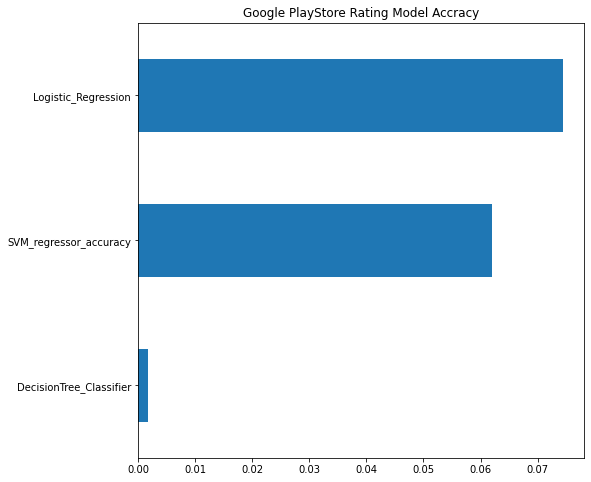

In [32]:
%matplotlib inline
model_accuracy = pd.Series(data=[accRLogisticRegression,accRDesision,accRSVC], 
        index=['Logistic_Regression','DecisionTree_Classifier','SVM_regressor_accuracy'])
fig= plt.figure(figsize=(8,8))
model_accuracy.sort_values().plot.barh()
plt.title('Google PlayStore Rating Model Accracy')

Text(0.5, 1.0, 'Google PlayStore Install Model Accracy')

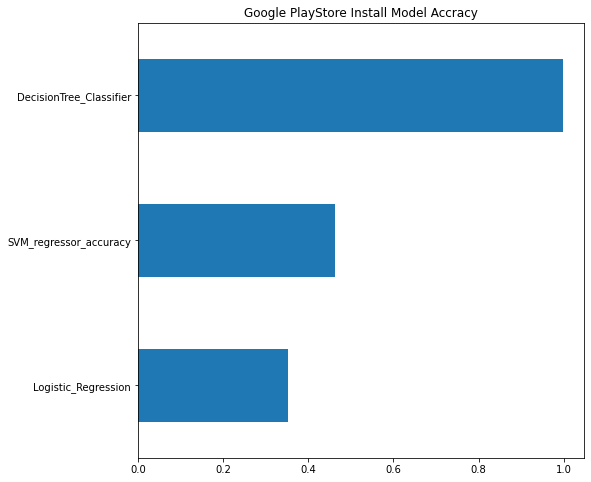

In [33]:
%matplotlib inline
model_accuracy = pd.Series(data=[accILogisticRageression,accIDesision,accISVC], 
        index=['Logistic_Regression','DecisionTree_Classifier','SVM_regressor_accuracy'])
fig= plt.figure(figsize=(8,8))
model_accuracy.sort_values().plot.barh()
plt.title('Google PlayStore Install Model Accracy')

Text(0.5, 1.0, 'AppleStore Rating Model Accracy')

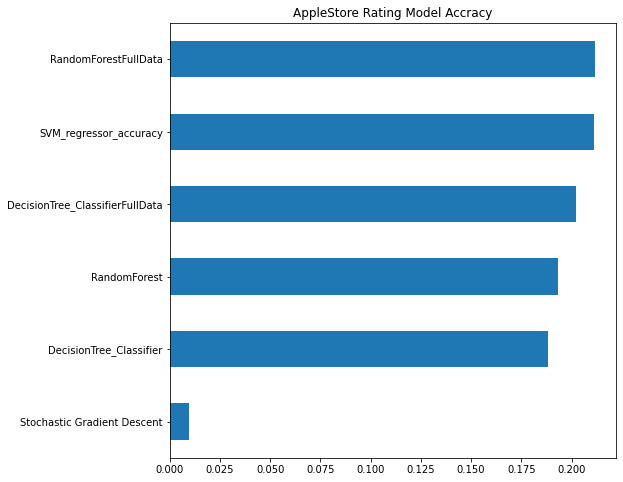

In [34]:
%matplotlib inline
model_accuracy = pd.Series(data=[accSGD,accDesisionFull,accDesision,accSVC, accRRandomForest,accRandomForest], 
        index=['Stochastic Gradient Descent','DecisionTree_ClassifierFullData','DecisionTree_Classifier','SVM_regressor_accuracy','RandomForestFullData', 'RandomForest'])
fig= plt.figure(figsize=(8,8))
model_accuracy.sort_values().plot.barh()
plt.title('AppleStore Rating Model Accracy')